# `1.` 패키지 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder         # 레이블 인코딩 모듈입니다.
from sklearn.model_selection import train_test_split   # 학습 세트와 테스트 세트를 나누기 위한 함수입니다.
from tensorflow.keras.models import Sequential         # 순차적으로 레이어를 쌓는 순차모델입니다. 
from tensorflow.keras.layers import Dense              # 뉴런의 입출력을 연결해주는 레이어입니다.
from tensorflow.keras.utils import to_categorical      # 원-핫 인코딩 모듈입니다.
from tensorflow.keras.callbacks import EarlyStopping   # 성능 개선이 이루어지지 않는 경우 자동으로 학습을 종료하는 함수입니다.
from tensorflow.keras.callbacks import ModelCheckpoint # 모델이 최적의 성능을 낼 때 자동으로 저장해주는 함수입니다.
from tensorflow.keras.models import load_model         # 최적의 성능 가중치가 저장된 모델을 불러올때 사용할 함수입니다.
from pandas._libs import index                         # 인덱스 번호를 추출하기 위한 함수입니다.

# `2.` 데이터 로드

In [ ]:
# 시트 순서 (전체 관광지[0]), (제주시, 추자면[1]), (초전읍, 구좌읍, 우도[2]), (한경면, 한림읍, 애월읍[3]), (서귀포시 남원읍[4]), (성산읍, 표선면[5]), (안덕면, 대정읍[6]) (테스트[7])
# train_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning.xlsx', sheet_name=1)
# test_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning.xlsx', sheet_name=7)
# train_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning(duplicate_data_x2).xlsx', sheet_name=1)
# test_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning(duplicate_data_x2).xlsx', sheet_name=7)
train_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning(duplicate_data_x3).xlsx', sheet_name=1)
test_data = pd.read_excel('/content/drive/MyDrive/Project/여행 코스 추천/data/학습용 데이터/tourist_data_learning(duplicate_data_x3).xlsx', sheet_name=7)

# `3.` 데이터 확인

In [ ]:
display(train_data.head())
print(train_data.info())

,Unnamed: 0,관광 명소,주소,역사,자연,사진,도보,예술,육상,수상,...,사계절,어린이,청년,중년,노년,혼자,친구,커플,부모,가족
0,11.0,한라산국립공원,제주특별자치도 제주시 1100로 2070-61,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.0,제주4.3평화공원,제주특별자치도 제주시 명림로 430,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,31.0,용두암,제주특별자치도 제주시 용두암길 15,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,제주절물자연휴양림,제주특별자치도 제주시 명림로 584,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41.0,이호테우말등대,제주특별자치도 제주시 서해안로 58,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  820 non-null    float64
 1   관광 명소       820 non-null    object 
 2   주소          820 non-null    object 
 3   역사          820 non-null    float64
 4   자연          820 non-null    float64
 5   사진          820 non-null    float64
 6   도보          820 non-null    float64
 7   예술          820 non-null    float64
 8   육상          820 non-null    float64
 9   수상          820 non-null    float64
 10  공중          820 non-null    float64
 11  봄           820 non-null    float64
 12  여름          820 non-null    float64
 13  가을          820 non-null    float64
 14  겨울          820 non-null    float64
 15  사계절         820 non-null    float64
 16  어린이         820 non-null    float64
 17  청년          820 non-null    float64
 18  중년          820 non-null    float64
 19  노년          820 non-null    f

# `4.` 전처리

## `4-1.` 결측값 확인

In [ ]:
# 데이터의 결측값을 확인합니다.
print('-------train_data 결측 값------- \n{}\n---------------------------------'.format(train_data.isna().sum()))

-------train_data 결측 값------- 
Unnamed: 0    0
관광 명소         0
주소            0
역사            0
자연            0
사진            0
도보            0
예술            0
육상            0
수상            0
공중            0
봄             0
여름            0
가을            0
겨울            0
사계절           0
어린이           0
청년            0
중년            0
노년            0
혼자            0
친구            0
커플            0
부모            0
가족            0
dtype: int64
---------------------------------


## `4-2.` 중복값 확인

In [ ]:
# '관광 명소' 데이터의 중복 값을 확인합니다.
duplicate_Idx = list(train_data[train_data.duplicated(['관광 명소']) == True].index) # 중복 값의 인덱스 번호를 duplicate_Idx 변수에 리스트 형태로 저장합니다.
print('중복값의 행 인덱스 번호: {}'.format(duplicate_Idx))                           # 중복 값이 있다면 리스트에 인덱스 번호가 저장되었을 것입니다. 출력하여 확인합니다.

중복값의 행 인덱스 번호: [205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,

## `4-3.` target 데이터 인코딩

In [ ]:
# LabelEncoder 모듈 객체를 생성합니다.
le_encoder = LabelEncoder()

# 사본 데이터를 만듭니다.
train_data_dup = train_data.copy()

# '관광 명소' 컬럼을 인코딩합니다.
train_data_dup['관광 명소'] = le_encoder.fit_transform(train_data_dup['관광 명소'])

## `4-4.` 데이터 분리

In [ ]:
# feature 데이터와 target 데이터로 분리합니다.
feature_data = train_data_dup.drop(['관광 명소', '주소', 'Unnamed: 0'], axis=1) # '관광 명소', '주소', 'Unnamed: 0' 컬럼을 제외한 나머지 컬럼을 feature_data 변수에 넘겨줍니다.
target_data = train_data_dup[['관광 명소']]                                     # '관광 명소' 컬럼을 target_data 변수에 넘겨줍니다.                                                     

## `4-5.` target 데이터 원-핫 인코딩

In [ ]:
# 활성화 함수 softmax를 사용하기 위해서 타깃 데이터를 원-핫 인코딩 해줍니다.
target_data = to_categorical(target_data)

# 데이터를 확인합니다.
print('target_data.shape: {}'.format(target_data.shape))

target_data.shape: (820, 205)


# `5.` 모델 구축 및 학습

In [ ]:
# Sequential 모델의 객체를 생성합니다.
model = Sequential()

# 입력 차원과 클래스 개수를 담은 변수를 선언합니다.
input_dim = 22
class_units = 205

# 모델을 설계합니다.
model.add(Dense(512, input_dim=input_dim, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(class_units, activation='softmax'))

# model.add(Dense(class_units, input_dim=input_dim, activation='softmax'))

# 모델을 컴파일합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후이므로 검증 데이터 손실이 4회 증가하면 정해진 에포크에 도달하지 못하여도 학습을 조기 종료합니다.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

# 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint(filepath='/content/drive/MyDrive/Project/여행 코스 추천/best_models/best_model_1.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

# 훈련을 진행합니다.
history = model.fit(feature_data, target_data, epochs=500, batch_size=1, callbacks=[es, mc], validation_split = 0.2)

Epoch 1/500
655/656 [============================>.] - ETA: 0s - loss: 4.9895 - accuracy: 0.0473
Epoch 1: val_accuracy improved from -inf to 0.20122, saving model to /content/drive/MyDrive/Project/여행 코스 추천/best_models/best_model_1.h5
656/656 [==============================] - 4s 5ms/step - loss: 4.9871 - accuracy: 0.0473 - val_loss: 3.4438 - val_accuracy: 0.2012
Epoch 2/500
654/656 [============================>.] - ETA: 0s - loss: 2.2733 - accuracy: 0.3899
Epoch 2: val_accuracy improved from 0.20122 to 0.52439, saving model to /content/drive/MyDrive/Project/여행 코스 추천/best_models/best_model_1.h5
656/656 [==============================] - 3s 5ms/step - loss: 2.2709 - accuracy: 0.3902 - val_loss: 1.5138 - val_accuracy: 0.5244
Epoch 3/500
650/656 [============================>.] - ETA: 0s - loss: 1.2970 - accuracy: 0.5569
Epoch 3: val_accuracy improved from 0.52439 to 0.60366, saving model to /content/drive/MyDrive/Project/여행 코스 추천/best_models/best_model_1.h5
656/65

# `6.` 학습 시각화

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



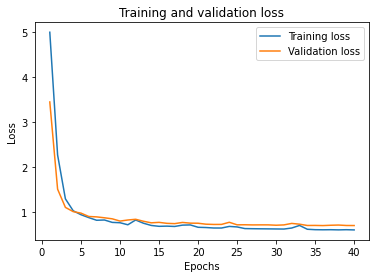

In [ ]:
# 그래프에 그릴 수 있는 항목을 확인합니다.
print(history.history.keys()) # history 변수에 기록된 값의 key를 출력합니다.
print()                       # 한줄을 띕니다.

# 시각화 합니다.
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

# `7.` 추천
- 조건
 1. 챗봇이나 웹에서 지역을 받는다.
 2. 사용자가 챗봇이나 웹에서 테마를 선택한다면 입력은 '1'이다.
 3. 특정 테마를 선택하지 않았다면 전체 테마의 값은 '1'이다.

- 학습 데이터에 없는 새로운 예측용 입력 데이터 (한라산 국립공원 태그에 역사 태그 1 추가)
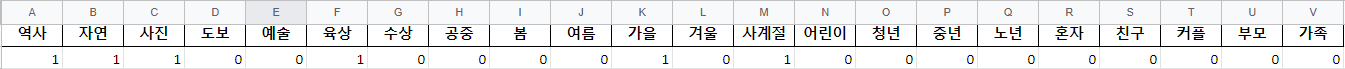


In [ ]:
# 최고의 성능을 냈었던 모델의 기록을 불러와 당시 가중치로 예측을 진행합니다.
best_model = load_model('/content/drive/MyDrive/Project/여행 코스 추천/best_models/best_model_1.h5')

# 예측을 진행합니다.
model_pred = best_model.predict(test_data, verbose=0)

# 모델이 예측한 각 클래스별 확률을 데이터 프레임으로 변환한 뒤 상위 n 개의 인덱스를 추출하고 해당 인덱스에 맞는 관광지의 이름과 주소를 출력합니다.
prob_each_class = pd.DataFrame(model_pred)            # 예측값을 데이터 프레임으로 변환합니다.
prob_each_class = prob_each_class.T                   # 데이터 프레임의 행과 열을 서로 뒤바꿉니다.
prob_each_class.columns = ['추천']                    # 컬럼명을 '추천'으로 바꿉니다.
idx = list(prob_each_class.nlargest(5, '추천').index) # '추천' 컬럼에서 클래스 확률 상위 5개의 인덱스 번호를 idx 변수에 리스트 형태로 전달합니다.
decoding = train_data.loc[idx, ['관광 명소', '주소']] # 원본 데이터에서 해당 인덱스 번호 행의 '관광 명소', '주소'를 가져와 decoding 변수에 전달합니다.

In [ ]:
decoding

,관광 명소,주소
195,캘리그라피 오월,제주특별자치도 제주시 오남로 90
178,제주중앙성당,제주특별자치도 제주시 관덕로8길 14
6,삼양해수욕장,제주특별자치도 제주시 삼양동
19,한라수목원,제주특별자치도 제주시 수목원길 72
152,예초리해변,제주특별자치도 제주시 추자면 예초리


# 문제점 및 개선 방안
1. 문제점
 - 정확도가 낮음: 입력을 받은 태그만을 조합하여 결과를 출력해야 하나 입력을 받지 않은(태그의 값이 0) 태그가 속한 결과도 출력함 이는 데이터의 수가 적어 충분히 학습이 이루어지지 않은 것이 이유로 보임.

2. 개선 방안
 - 의미 없는 값, 중복 값을 통해 데이터를 증강 시켜볼 것.

# 데이터 증강에 따른 결과 변화 (제주시, 추자도 한정)
1. 기본 데이터  
image.png  
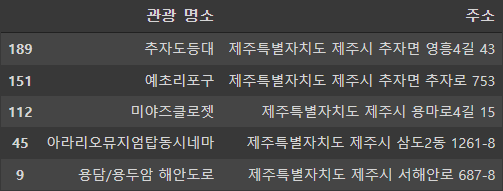
2. 중복 값 x2  
image.png  
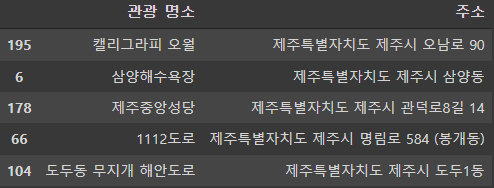
3. 중복 값 x3  
image.png  
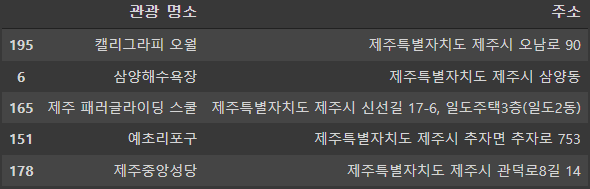
